<a href="https://colab.research.google.com/github/prakashr7d/computer_vision/blob/main/Day_night_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import os

Getting file from drive and storing in the python

In [54]:
training_image_path = '/content/drive/MyDrive/image for computer vision/day_night_images/training'
testing_image_path = '/content/drive/MyDrive/image for computer vision/day_night_images/test'

class_id = [0,1]
CLASSES = ['day','night']

def load_dataset(path):
  all_images = []
  i = -1
  for Class in CLASSES:
    i +=1
    for file in glob.glob(os.path.join(path,Class,'*')):

      img = mpimg.imread(file)

      if not img is None:
        all_images.append((img,class_id[i]))
  return all_images

training_images = load_dataset(training_image_path)
testing_images = load_dataset(testing_image_path)

      




In [41]:
len(training_images)
dimension = training_images[0][0].shape
print(dimension)

(889, 1280, 3)


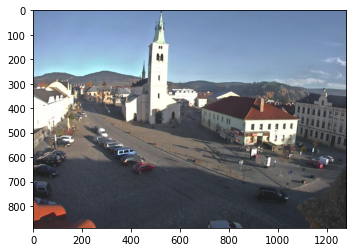

In [42]:
plt.imshow(training_images[0][0])

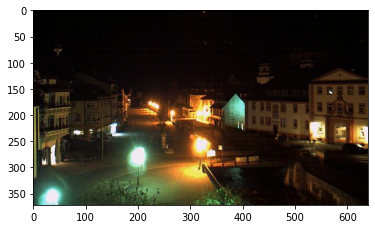

In [43]:
plt.imshow(training_images[121][0])

# shape of the image

In [44]:
X_COR = 600
Y_COR = 1100

# Standardising all the image in the same shape

In [45]:
def standardize_input(images):
  standard_im = []
  for image in images:
    standard_im.append((image[0][:X_COR,:Y_COR],image[1]))

  return standard_im

    

In [46]:
sd_img = standardize_input(training_images)

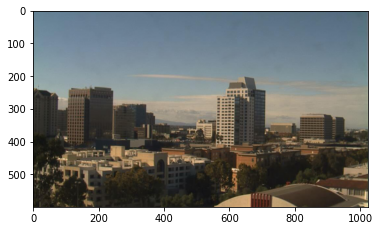

In [47]:
plt.imshow(sd_img[6][0])

Converting HSV color space to visualise how the feature are in it

In [48]:
def convert_to_hsv(standard_img):
  hsv_image = []
  for image in standard_img:
    image = cv2.cvtColor(image[0],cv2.COLOR_RGB2HSV)
    hsv_image.append((image,image[1]))
  
  return hsv_image

hsv_sd_img = convert_to_hsv(np.copy(sd_img))


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)


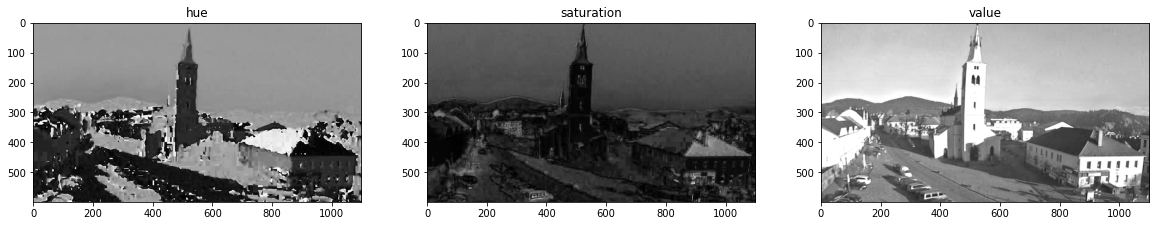

In [49]:
h = hsv_sd_img[0][0][:,:,0]
s = hsv_sd_img[0][0][:,:,1]
v = hsv_sd_img[0][0][:,:,2]

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
ax1.set_title('hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('value')
ax3.imshow(v, cmap='gray')

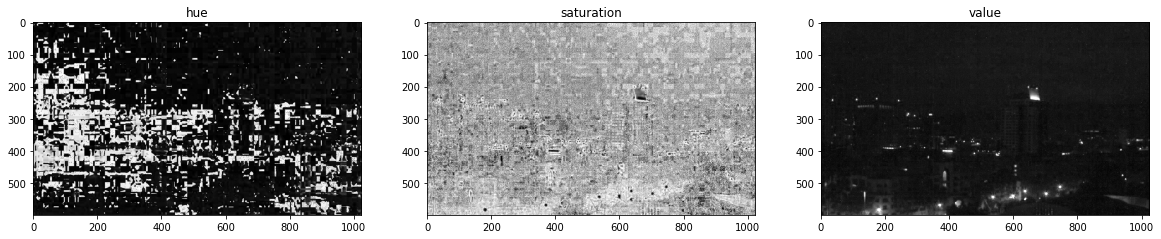

In [50]:
h = hsv_sd_img[140][0][:,:,0]
s = hsv_sd_img[140][0][:,:,1]
v = hsv_sd_img[140][0][:,:,2]

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
ax1.set_title('hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('value')
ax3.imshow(v, cmap='gray')

calculating the average brightness in the picture according to the value in the Hs'V'

In [63]:
def average_brightness(image):
  image = cv2.cvtColor(image[0],cv2.COLOR_RGB2HSV)

  total_value = np.sum(image[:,:,2])

  area = 600*1100

  avg_brightness =  total_value/area

  return avg_brightness

# Average brightness of the night image

average brightness: 17.68672878787879


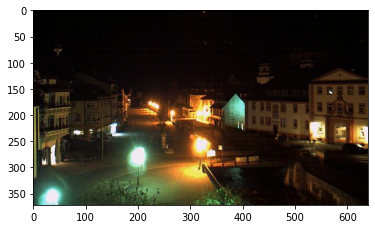

In [64]:
img_no = 121
plt.imshow(sd_img[img_no][0])
print("average brightness:", average_brightness(sd_img[img_no]))

# Average brightness of the day image

average brightness: 152.7784772727273


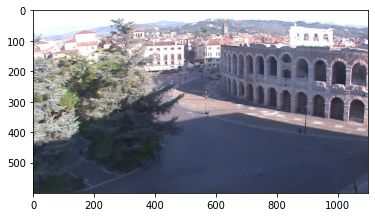

In [65]:
img_no = 21
plt.imshow(sd_img[img_no][0])
print("average brightness:", average_brightness(hsv_sd_img[img_no])

# Classifying the image based on the average brightness tha we got with the threshold value of 100.

In [66]:
def classify_label(rgb_image):
  brightness = average_brightness(rgb_image)
  
  threshold = 100

  predicted_label = 0

  if brightness > 100:
    predicted_label = 1

  return predicted_label

The picture is in day


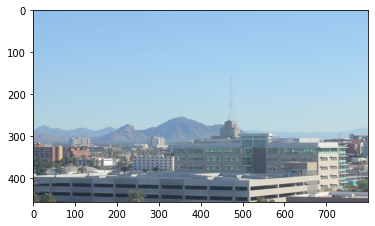

In [67]:
img_no = 80
label = classify_label(sd_img[img_no])
plt.imshow(sd_img[img_no][0])

if label == 0:
  print("The picture is in night")
else:
  print("The picture is in day")

# Finding in what accuracy does our classifier working 

In [75]:
def misclassified_images(test_images):

  misclassified_image = 0
  for image in test_images:
    true_label = image[1]

    classified_label = classify_label(image)

    if true_label != classify_label:
      misclassified_image+=1
    
    return misclassified_image







In [76]:
total_images = len(testing_images)
wrong_images = misclassified_images(testing_images)

In [78]:
accuracy = (total_images-wrong_images)/total_images
print(f"It correctly predicted {-wrong_images+total_images} out of {total_images} ")
print(f"accuracy is: {accuracy}")

It correctly predicted 159 out of 160 
accuracy is: 0.99375
